In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


<IPython.core.display.Javascript object>


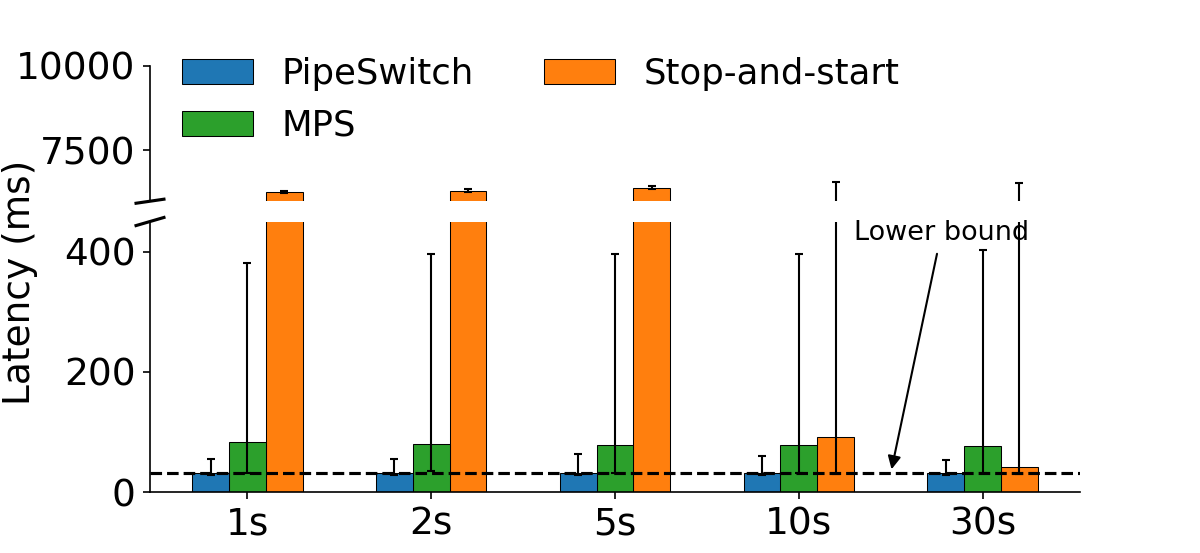

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [2]:
# V100 result
file_name = "Eval_system_latency.pdf"
sys_name = "PipeSwitch"

intervals = ['1s', '2s', '5s', '10s', '30s']

our_sys = [32.310043029232766, 32.21757734471539, 
           32.145160522948565, 32.3249236662986, 
           32.40527434978599]

our_sys_yerr = np.array([[3.3161980432708518, 22.293772049502586], 
                         [3.1913074319956607, 22.96225702112934], 
                         [3.116983261596026, 31.895500335205732], 
                         [3.2702819426657896, 28.30778202217796], 
                         [3.41190620098228, 21.437508624457173]]).T

kill_restart = [6266.83055029975, 6294.484921864101, 6403.910398483276, 
                90.95868490038127, 
                41.426614552429726]

kill_restart_yerr = np.array([[32.84417258368558, 44.84523667229587], 
                              [35.6305326734273, 72.65584809439497], 
                              [30.942201614379883, 32.1042537689209], 
                              [61.331361749746506, 6468.853384038828], 
                              [11.640743046692421, 6495.63769933612]]).T

# TODO mps results update
mps = [83.46177682053619, 79.29460095465164, 
       78.08835970830373, 78.07119123090264, 
       76.79601950055465]

mps_yerr = np.array([[51.24212845933013, 297.03], 
                     [43.49915074408035, 317.4272389501335],
                     [47.02814089726857, 317.5932599358613], 
                     [46.45140401471612, 318.1096769179011], 
                     [44.879877990544884, 326.2870665132393]]).T


# unified_mem = [67.2955766342694, 56.51779661584878, 
#                49.97314311820713, 48.09750088654029, 
#                47.99078327802423]

# unified_mem_yerr = np.array([[20.059928965586394, 375.5466936340649], 
#                              [23.40343464541015, 297.2450920676142], 
#                              [18.732887131587923, 289.91405767442336], 
#                              [16.94620428955068, 175.7960065308858], 
#                              [16.75227830102385, 135.53495269963886]]).T


x = np.arange(len(intervals))
width = 0.8
n = 4

# setup font size
font_size = 18
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)

# fig, ax = plt.subplots()
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 3.69),
                              gridspec_kw={'height_ratios': [1, 2]})
plt.subplots_adjust(hspace=0.1)


rects2 = ax.bar(x + width/n, kill_restart, width/n, label='Stop-and-start', 
                yerr=kill_restart_yerr,
                error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
                edgecolor='black', color='tab:orange')

rects3 = ax.bar(x , mps, width/n, label='MPS', 
                yerr=mps_yerr,
                error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
                edgecolor='black',color='tab:green'
               )

# upper part
rects1 = ax.bar(x - width/n, our_sys, width/n, label=sys_name, 
                yerr=our_sys_yerr,
                error_kw={'capsize':2, 'elinewidth':1},
                edgecolor='black', linewidth=0.5, color='tab:blue'
                )


# rects4 = ax.bar(x , unified_mem, width/n, label="Unified Memory",
#                 yerr=unified_mem_yerr,
#                 error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
#                 edgecolor='black')





# bottom part
rects2_2 = ax2.bar(x + width/n, kill_restart, width/n, label='Stop-and-start', 
                yerr=kill_restart_yerr,
                error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
                edgecolor='black', color='tab:orange')

rects2_3 = ax2.bar(x , mps, width/n, label='MPS', 
                yerr=mps_yerr,
                error_kw={'capsize':2, 'elinewidth':1}, linewidth=0.5,
                edgecolor='black', color='tab:green')

rects2_1 = ax2.bar(x - width/n, our_sys, width/n, label=sys_name, 
                yerr=our_sys_yerr,
                error_kw={'capsize':2, 'elinewidth':1},
                edgecolor='black', linewidth=0.5,color='tab:blue'
                )

# rects2_4 = ax2.bar(x , unified_mem, width/n, label="Unified Memory",
#                 yerr=unified_mem_yerr,
#                 error_kw={'capsize':2, 'elinewidth':1}, linewidth=0.5,
#                 edgecolor='black')




ax.set_ylim(6000, 10000)
ax2.set_ylim(0, 450)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax.tick_params(bottom=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.yaxis.set_label_coords(-0.12, -0.6)
ax.set_ylabel('Latency (ms)')
# ax.set_title('End to End Latency: vs Simple Transmission (V100)')
ax.set_xticks(x)
ax.set_xticklabels(intervals)
ax.legend([rects1, rects3, rects2], ['PipeSwitch', 'MPS', 'Stop-and-start'],
    frameon=False, ncol=2, loc='upper left',
          bbox_to_anchor=(0.0, 0.8, 0.5, 0.5),
          prop={'size': font_size-1})

# fig.tight_layout()
bar_size = 16
offset=0.30
upper_bar = 5600
lower_bar = 710
# ax.text(offset, upper_bar, "/",rotation=-55, fontdict={'family': 'serif',
#                                     'color':  'black',
#                                     'weight': 'normal',
#                                     'size': bar_size,
#                                     })
# ax2.text(offset, lower_bar, "/",rotation=-55, fontdict={'family': 'serif',
#                                     'color':  'black',
#                                     'weight': 'normal',
#                                     'size': bar_size,
#                                     })
# ax.text(1+offset, upper_bar, "/",rotation=-55, fontdict={'family': 'serif',
#                                     'color':  'black',
#                                     'weight': 'normal',
#                                     'size': bar_size,
#                                     })
# ax2.text(1+offset, lower_bar, "/",rotation=-55, fontdict={'family': 'serif',
#                                     'color':  'black',
#                                     'weight': 'normal',
#                                     'size': bar_size,
#                                     })
# ax.text(2+offset, upper_bar, "/",rotation=-55, fontdict={'family': 'serif',
#                                     'color':  'black',
#                                     'weight': 'normal',
#                                     'size': bar_size,
#                                     })
# ax2.text(2+offset, lower_bar, "/",rotation=-55, fontdict={'family': 'serif',
#                                     'color':  'black',
#                                     'weight': 'normal',
#                                     'size': bar_size,
#                                     })


ax2.axhline(31.15, ls='--', c='k')

kwargs = dict()
ax2.annotate('Lower bound', xy=(3.5, 31.15),  
            xytext=(3.3, 420),
            arrowprops=dict(facecolor='black', arrowstyle='-|>'),
            fontsize=13
            )

# plt.show()
plt.savefig(file_name, format="pdf")